# Imports

In [ ]:
# run this to fix or avoid dataloader warnings and data loading incorrectly
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 4.0MB 30.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
# !pip uninstall fastai
!pip install --no-deps "fastai==1.0.61"
# !pip install --no-deps "fastai==2.2.6"
# !pip install $(python setup.py -q deps --dep-groups=core,vision)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
!ls /usr/local/lib/python3.7/dist-packages/fastai

basic_data.py	datasets.py	      metrics.py	  train.py
basics.py	distributed.py	      __pycache__	  utils
basic_train.py	gen_doc		      script.py		  version.py
callback.py	general_optimizer.py  sixel.py		  vision
callbacks	imports		      tabular		  widgets
collab.py	__init__.py	      test_registry.json
core.py		launch.py	      text
data_block.py	layers.py	      torch_core.py


In [ ]:
!cat /usr/local/lib/python3.7/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.61'


# Download data

In [ ]:
api_token = {"username": "x", "key": "y"} #
!mkdir -p ~/.kaggle/
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls -la /root/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 May 21 06:56 .
drwx------ 1 root root 4096 May 21 06:56 ..
-rw------- 1 root root   73 May 21 06:56 kaggle.json


In [ ]:
path = Config.data_path()/'breast-cancer'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/breast-cancer')

In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset -p {path}

 99% 193M/195M [00:06<00:00, 26.9MB/s]
100% 195M/195M [00:06<00:00, 30.3MB/s]


In [ ]:
path.ls()

[]

In [ ]:
!unzip -q -n {path}/breast-ultrasound-images-dataset.zip -d {path}

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/breast-cancer/breast-ultrasound-images-dataset.zip'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT')]

In [ ]:
!rm -rf /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
!ls -la /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT #/models

total 80
drwxr-xr-x 5 root root  4096 May 20 16:26 .
drwxr-xr-x 3 root root  4096 May 20 16:26 ..
drwxr-xr-x 2 root root 36864 May 20 16:26 benign
drwxr-xr-x 2 root root 20480 May 20 16:26 malignant
drwxr-xr-x 2 root root 12288 May 20 16:26 normal


In [ ]:
path = path/'Dataset_BUSI_with_GT'

# Load data

In [ ]:
files = get_image_files(path, recurse=True)
len(files), type(files)

(1578, list)

In [ ]:
files[:3]

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (115)_mask.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (119).png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (39).png')]

In [ ]:
mask_files = list(sorted(path.rglob('*_mask.png')))
len(mask_files), mask_files[0]

(780,
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (1)_mask.png'))

In [ ]:
img_files = list(sorted(path.rglob('*[!_mask].png')))
len(img_files), img_files[0]

(798,
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (1).png'))

In [ ]:
bad_files = list(sorted(path.rglob('*_mask_*')))
# len(bad_files)
bad_files

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (163)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (173)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (181)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (25)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (315)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (346)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (4)_mask_1.png'),
 Po

In [ ]:
tst = list(path.rglob('*benign (195)*')); tst

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195).png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png')]

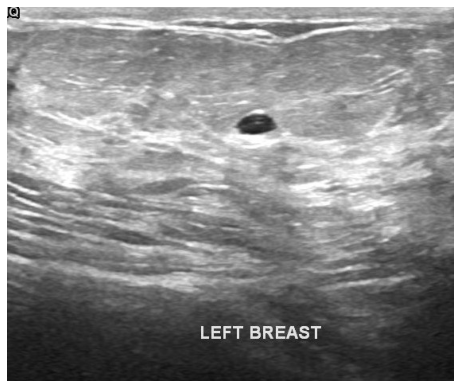

In [ ]:
img1 = open_image(img_files[0])
img1.show(figsize=(8,8))

## Y functions

In [ ]:
def get_y_fn(x): return path/f"{x.parent.name}/{x.stem}{x.suffix}"

def label_func(x): 
  if 'mask_' not in x.stem:
    return path/f"{x.parent.name}/{x.stem}_mask{x.suffix}"

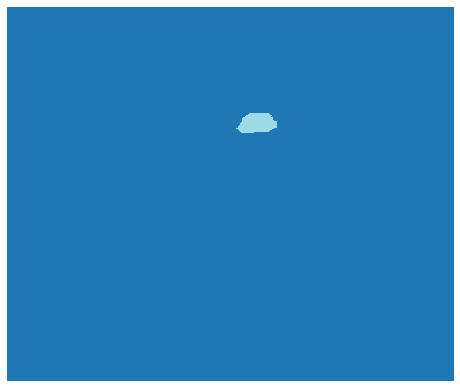

In [ ]:
mask = open_mask(get_y_fn(mask_files[0]), div=True)
mask.show(figsize=(8,8), alpha=1)

In [ ]:
mask.shape , np.unique(mask)

(torch.Size([1, 471, 562]), array([ImageSegment (1, 471, 562)], dtype=object))

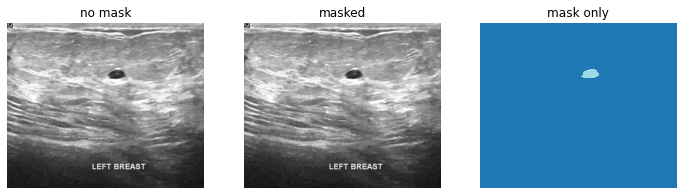

In [ ]:
_,axs = plt.subplots(1,3, figsize=(12,6))
img1.show(ax=axs[0], title='no mask')
img1.show(ax=axs[1], title='masked')
mask.show(ax=axs[2], title='mask only', alpha=1.)


In [ ]:
rle_encode(mask.data)

'75620 18 76175 26 76736 28 77296 32 77856 33 78417 34 78978 37 79539 39 80101 39 80662 41 81224 43 81786 44 82347 45 82908 46 83470 46 84031 47 84593 47 85153 49 85715 49 86275 48 86838 46 87401 43 87965 39 88528 36 89091 17 89654 12'

In [ ]:
src_size = np.array(mask.shape[1:])
src_size

array([471, 562])

In [ ]:
size = src_size//2
size

array([235, 281])

In [ ]:
codes = np.array(['normal', 'benign', 'malignant'])
codes

array(['normal', 'benign', 'malignant'], dtype='<U9')

## Mask converter

In [ ]:
mask_tmp = open_mask(get_y_fn(mask_files[453])).data.numpy()
mask_files[453], np.unique(mask_tmp), mask_tmp

(PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (113)_mask.png'),
 array([  0, 255]),
 array([[[0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         ...,
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0],
         [0, 0, 0, 0, ..., 0, 0, 0, 0]]]))

In [ ]:
m = open_mask(get_y_fn(mask_files[3])).data.numpy()#.flatten()
# print(mask_files[3])
nm = np.zeros(mask.shape)
nm[m == 2] = 2
nm.shape, np.unique(nm) #, m.shape, np.unique(m)

In [ ]:
# from https://forums.fast.ai/t/unet-segmentation-mask-converter-to-help-against-common-errors-problems/42949
from fastai.callbacks.hooks import *
import PIL.Image as PilImage

def replace_mask_values_zero_to_n(mask, class_value):
  new_mask = np.zeros(mask.shape)
  new_mask[mask == 255] = class_value
  return new_mask

def convert_mask_to_pil_and_save(mask, save_to):
  image_size = mask.squeeze().shape
  im = PilImage.new('L', (image_size[1], image_size[0]))
  im.putdata(mask.astype('uint8').ravel())
  im.save(save_to)

def convert_masks_to_grayscale_zero_to_n(mask_files, save_to_path):
  labels = {'benign' : 1, 'malignant' : 2}
  for current_file in mask_files:
    if current_file.parent.name != 'normal':
      current_mask = open_mask(current_file).data.numpy()
      class_value = labels[current_file.parent.name]
      converted_mask = replace_mask_values_zero_to_n(current_mask, class_value)
      convert_mask_to_pil_and_save(converted_mask, 
                                  save_to_path/f'{current_file.parent.name}/{current_file.name}')
  print('Conversion finished!')

In [ ]:
mask_files[0].parent.name

'benign'

In [ ]:
convert_masks_to_grayscale_zero_to_n(mask_files, path)

Conversion finished!


# Data loader

In [ ]:
# raw masks convertion classes
class SegmentationLabelListWithDiv(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)
class SegmentationItemListWithDiv(SegmentationItemList):
    _label_cls = SegmentationLabelListWithDiv

In [ ]:
# for raw mask files
src = (SegmentationItemListWithDiv.from_folder(path, recurse=True)
        .filter_by_func(lambda x: '_mask' not in x.stem)
        .split_by_rand_pct()
        .label_from_func(label_func, classes=codes)) # get_y_fn

In [ ]:
# for converted mask files
src = (SegmentationItemList.from_folder(path, recurse=True)
        .filter_by_func(lambda x: '_mask' not in x.stem)
        .split_by_rand_pct()
        .label_from_func(label_func, classes=codes)) # get_y_fn

In [ ]:
test_l = src.label_from_func(get_y_fn, classes=codes); test_l

LabelLists;

Train: LabelList (624 items)
x: SegmentationItemList
Image (3, 486, 552),Image (3, 587, 767),Image (3, 474, 509),Image (3, 468, 561),Image (3, 576, 779)
y: SegmentationLabelList
ImageSegment (1, 486, 552),ImageSegment (1, 587, 767),ImageSegment (1, 474, 509),ImageSegment (1, 468, 561),ImageSegment (1, 576, 779)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemList
Image (3, 572, 763),Image (3, 580, 766),Image (3, 578, 689),Image (3, 467, 552),Image (3, 700, 857)
y: SegmentationLabelList
ImageSegment (1, 572, 763),ImageSegment (1, 580, 766),ImageSegment (1, 578, 689),ImageSegment (1, 467, 552),ImageSegment (1, 700, 857)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None

In [ ]:
dls = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=4) # 4 for resnet50
        # .normalize()
        .normalize(imagenet_stats)
)

In [ ]:
from matplotlib import colors
custom_cmap = colors.ListedColormap(["red", "green", "blue"])
custom_norm = colors.Normalize(vmin=1, vmax=3)

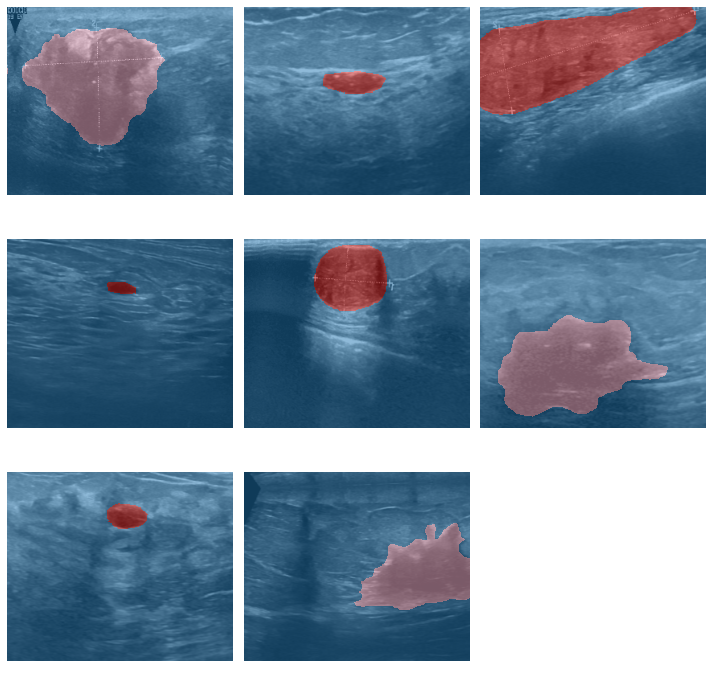

In [ ]:
dls.show_batch(rows=3, figsize=(10,10), cmap=custom_cmap, norm=custom_norm)

In [ ]:
dls.show_batch(rows=3, figsize=(10,10), alpha=.5) # , class_names=codes, reverse=True, vmin=0, vmax=2

In [ ]:
dls.valid_ds.classes, dls.c

(array(['normal', 'benign', 'malignant'], dtype='<U9'), 3)

In [ ]:
dls.single_from_classes

<function fastai.vision.data.ImageDataBunch.single_from_classes>

In [ ]:
dls.train_ds[0]

(Image (3, 235, 281), ImageSegment (1, 235, 281))

In [ ]:
dls.valid_ds.

SegmentationLabelListWithDiv (156 items)
ImageSegment (1, 578, 772),ImageSegment (1, 451, 573),ImageSegment (1, 468, 552),ImageSegment (1, 464, 554),ImageSegment (1, 583, 779)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
dls.valid_ds

LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
dls.presize

<bound method _presize of ImageDataBunch;

Train: LabelList (624 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None>

In [ ]:
dls.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (624 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None>

In [ ]:
xc, yc = next(iter(dls.valid_dl))
torch.unique(yc)

tensor([0, 1, 2], device='cuda:0')

# Model resnet34

In [ ]:
def custom_loss(y_hat,y):
    y = y.squeeze(1)
    loss = nn.CrossEntropyLoss(ignore_index=255)
    return loss(y_hat,y)

def custom_loss1(y_hat, y):
  y = y.squeeze(1)
  return nn.CrossEntropyLoss(y_hat, y)

In [ ]:
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

def segment_acc(input, target):
  target = target.squeeze(1)
  return (input.argmax(dim=1)==target).float().mean()

acc_2 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta) # , thresh=0.2
dice_iou = partial(dice, iou=True)

In [ ]:
# metrics=segment_acc
metrics=[segment_acc, f_score, dice_iou]

In [ ]:
wd=1e-2

In [ ]:
learn = unet_learner(dls, models.resnet34, #wd=wd, 
                    #  pretrained=False,
                    #  y_range=(0,2), 
                    #  loss_func=custom_loss,
                    #  loss_func=custom_loss1,
                     metrics=metrics)

In [ ]:
learn.summary()

## Train stage 1

epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


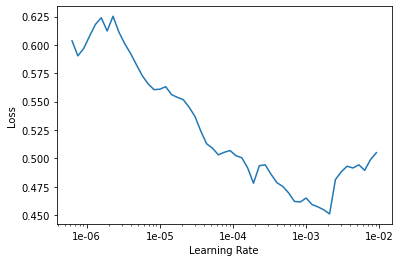

In [ ]:
# 2021-05-21 mask (0,1,2) converted, pretrained, default loss fn, imagenet normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


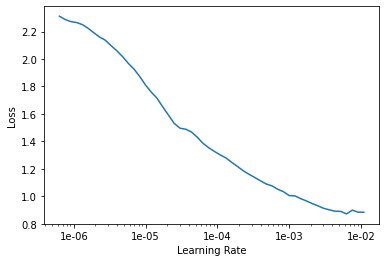

In [ ]:
# 2021-05-15 restored, mask converted, pretrained, default loss fn, imagenet normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


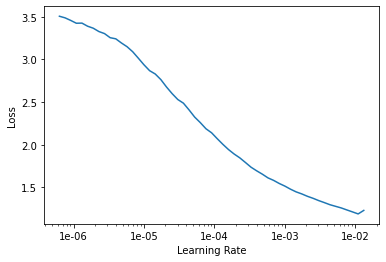

In [ ]:
# 2021-05-14 restored, mask converted, pretrained, default loss fn, raw normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


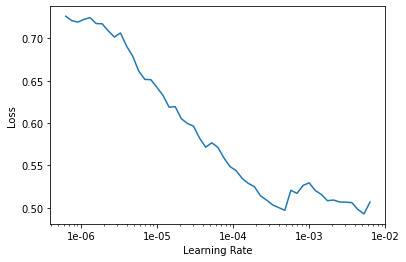

In [ ]:
# 2021-05-14 restored, mask converted, pretrained, default loss fn, imagenet normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


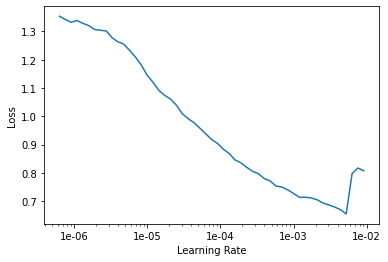

In [ ]:
# 2021-04-24 mask converted, pretrained, custom loss fn, raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


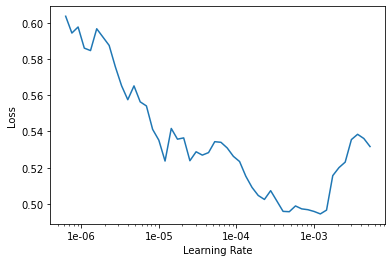

In [ ]:
# 2021-04-24 mask converted, pretrained, default loss fn, raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


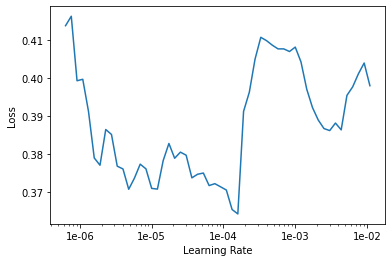

In [ ]:
# 2021-04-22 pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


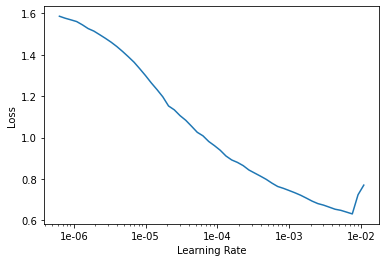

In [ ]:
# 2021-04-18 pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


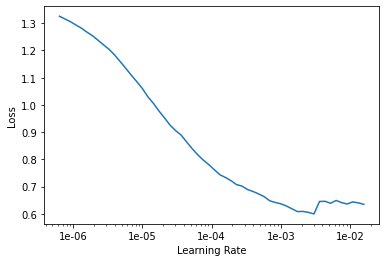

In [ ]:
# 2021-04-18 not pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


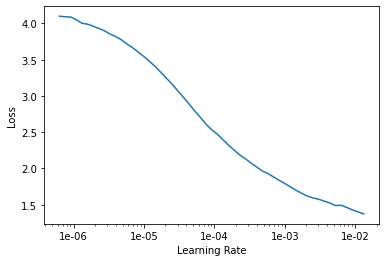

In [ ]:
# 2021-04-18  pretrained. without y_range, wd. imagenet normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


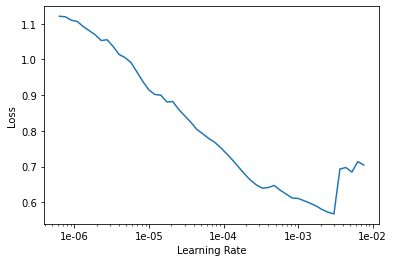

In [ ]:
# 2021-04-16 without y_range
lr_find(learn)
learn.recorder.plot()

### Stage 1 plot losses

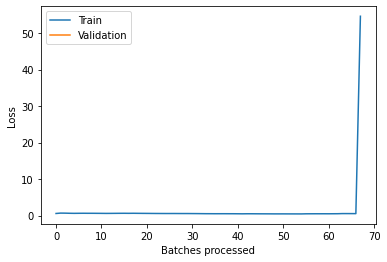

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# get predictions
img = learn.data.train_ds[0][0]
learn.predict(img)

(ImageSegment (1, 235, 281), tensor([[[0, 2, 0,  ..., 0, 0, 0],
          [2, 2, 0,  ..., 0, 0, 0],
          [0, 2, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [2, 2, 2,  ..., 2, 0, 0]]]), tensor([[[0.4466, 0.4125, 0.5241,  ..., 0.5110, 0.5039, 0.5464],
          [0.4115, 0.3856, 0.4960,  ..., 0.5188, 0.4909, 0.4979],
          [0.4983, 0.4324, 0.5703,  ..., 0.5921, 0.4825, 0.5963],
          ...,
          [0.5605, 0.6481, 0.7807,  ..., 0.7517, 0.6889, 0.7017],
          [0.4495, 0.4929, 0.6105,  ..., 0.6556, 0.6554, 0.7152],
          [0.2989, 0.3527, 0.3797,  ..., 0.3755, 0.4556, 0.4339]],
 
         [[0.1568, 0.1541, 0.1315,  ..., 0.2111, 0.1889, 0.1685],
          [0.1563, 0.1596, 0.1250,  ..., 0.2172, 0.1772, 0.1972],
          [0.1107, 0.1204, 0.0526,  ..., 0.0918, 0.1002, 0.1792],
          ...,
          [0.1393, 0.0550, 0.0421,  ..., 0.0300, 0.0394, 0.1091],
          [0.1236, 0.0471, 0.0506,  ..., 0.031

In [ ]:
learn.save('rn34-stage-1');

In [ ]:
learn.load('rn34-stage-1')

## Train stage 2

In [ ]:
# 2021-05-21 mask (0,1,2) converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-5), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time
0,0.512145,0.380811,0.923347,0.084467,0.000517,01:26
1,0.398592,0.272395,0.926512,0.096542,0.009851,01:26
2,0.317765,0.213564,0.932666,0.074976,0.331181,01:26
3,0.271121,0.215179,0.934180,0.075175,0.484220,01:26
4,0.245311,0.190249,0.938987,0.072931,0.434381,01:26
5,0.236082,0.199727,0.938696,0.066296,0.432045,01:26
6,0.227240,0.178233,0.942575,0.071440,0.733322,01:26
7,0.220963,0.177666,0.943077,0.071608,0.599070,01:26
8,0.219576,0.175414,0.943160,0.068773,0.663368,01:26
9,0.211906,0.175740,0.943324,0.067187,0.718402,01:26


In [ ]:
# 2021-05-19 mask (1,2,3) converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,acc_camvid,dice,time
0,0.841946,0.533292,0.873429,0.011589,0.019986,01:32
1,0.505746,0.400232,0.907501,0.001371,0.002646,01:31
2,0.371444,0.323173,0.910051,0.043320,0.070573,01:31
3,0.312942,0.301354,0.914329,0.124208,0.251025,01:30
4,0.289863,0.274580,0.917181,0.164441,0.330119,01:30
5,0.264054,0.265512,0.916224,0.276616,0.514610,01:30
6,0.245257,0.278459,0.917357,0.166464,0.321900,01:30
7,0.237875,0.257265,0.921335,0.250585,0.489859,01:30
8,0.239016,0.256264,0.921860,0.258703,0.513654,01:30
9,0.229084,0.253247,0.921271,0.264211,0.524537,01:30


In [ ]:
# 2021-05-15 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.645014,0.450450,0.880487,0.060845,0.212740,00:43
1,0.330360,0.323490,0.909216,0.189692,0.211811,00:42
2,0.283823,0.257010,0.919083,0.152664,0.215177,00:42
3,0.280555,0.259765,0.920816,0.233898,0.211289,00:42
4,0.222019,0.222257,0.928342,0.264398,0.210741,00:42
5,0.244937,0.217305,0.929150,0.219617,0.213214,00:42
6,0.218272,0.225870,0.929753,0.241966,0.212623,00:42
7,0.228871,0.211945,0.932629,0.225742,0.211852,00:42
8,0.206959,0.211113,0.933099,0.246496,0.210939,00:42
9,0.206461,0.210001,0.933962,0.256403,0.208828,00:42


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, raw normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,1.927699,1.005329,0.732909,0.173584,00:37
1,0.807075,0.465203,0.886457,0.220071,00:37
2,0.436158,0.317061,0.895923,0.226752,00:37
3,0.310763,0.279623,0.913574,0.226558,00:37
4,0.274411,0.264467,0.919452,0.226256,00:37
5,0.256573,0.256516,0.918797,0.226849,00:37
6,0.240742,0.247569,0.923505,0.226353,00:37
7,0.235961,0.240422,0.925503,0.226612,00:37
8,0.225898,0.234755,0.926899,0.226619,00:37
9,0.232431,0.239446,0.925453,0.226606,00:37


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.516551,0.437001,0.904366,0.110393,0.218831,00:38
1,0.393736,0.321675,0.908558,0.122115,0.223295,00:37
2,0.301506,0.251849,0.918040,0.128571,0.225518,00:37
3,0.273960,0.259222,0.915007,0.099416,0.226953,00:37
4,0.249898,0.277244,0.912179,0.076485,0.227100,00:37
5,0.230378,0.225227,0.927511,0.091775,0.226647,00:37
6,0.219205,0.221486,0.928429,0.133533,0.225236,00:37
7,0.207869,0.215210,0.929596,0.129692,0.225081,00:37
8,0.217013,0.216146,0.927946,0.109557,0.226617,00:37
9,0.210106,0.213199,0.929804,0.120494,0.226007,00:37


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.680932,0.410073,0.907959,0.188756,00:37
1,0.396957,0.264485,0.921281,0.188163,00:36
2,0.316813,0.243690,0.927048,0.187368,00:37
3,0.279035,0.219458,0.931725,0.187326,00:36
4,0.271291,0.216021,0.933683,0.187390,00:37


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss.
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.500587,0.410810,0.917270,0.108567,00:40
1,0.413436,0.322445,0.922008,0.118920,00:40
2,0.325408,0.244454,0.926382,0.157369,00:40
3,0.280886,0.215360,0.933783,0.161157,00:40
4,0.255209,0.198355,0.938180,0.160875,00:40
5,0.245563,0.192450,0.938699,0.156871,00:40
6,0.234384,0.191222,0.941111,0.156827,00:40
7,0.232131,0.188546,0.940426,0.164314,00:40
8,0.222857,0.179665,0.943379,0.162175,00:40
9,0.233675,0.179702,0.943908,0.159550,00:40


In [ ]:
# 2021-04-24 masks converted pretrained. raw normalized.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.708388,0.418323,0.917193,0.171285,00:40
1,0.406274,0.265663,0.924668,0.182408,00:38
2,0.311669,0.232729,0.930509,0.184969,00:38
3,0.273115,0.219508,0.934195,0.185374,00:38
4,0.262789,0.215775,0.935238,0.185961,00:38


In [ ]:
# 2021-04-23 pretrained. get_transforms(flip_vert=True), y_range(0,2), wd. raw normalized. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.666524,0.426614,0.911331,0.183421,00:40
1,0.461274,0.413425,0.914290,0.183421,00:38
2,0.419138,0.411072,0.914368,0.183421,00:38
3,0.417635,0.410976,0.914378,0.183421,00:38
4,0.416101,0.410969,0.914380,0.183421,00:38


In [ ]:
# 2021-04-22 pretrained. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.359204,0.278493,0.921646,0.129480,00:35
1,0.267873,0.202808,0.929139,0.130219,00:36
2,0.216311,0.183955,0.935531,0.129861,00:36
3,0.194030,0.167351,0.939963,0.128643,00:36
4,0.186549,0.165904,0.941331,0.129058,00:37


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.656557,0.372169,0.892197,0.155810,00:37
1,0.343509,0.250511,0.914935,0.153803,00:38
2,0.244867,0.214196,0.924404,0.153773,00:37
3,0.213989,0.201667,0.928442,0.153764,00:37
4,0.190264,0.200247,0.928293,0.153761,00:37


In [ ]:
learn.fit_one_cycle(5, slice(lr), wd=wd, pct_start=0.9) # slice(1e-05,1e-02)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.735917,0.673783,0.734975,0.133201,00:39
1,0.595729,0.481899,0.861958,0.127657,00:39
2,0.489260,0.409297,0.893723,0.125267,00:39
3,0.412026,0.348372,0.909835,0.127663,00:39
4,0.368965,0.317430,0.915033,0.129029,00:39


### Stage 2 results

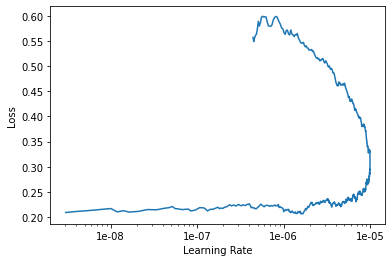

In [ ]:
learn.recorder.plot()

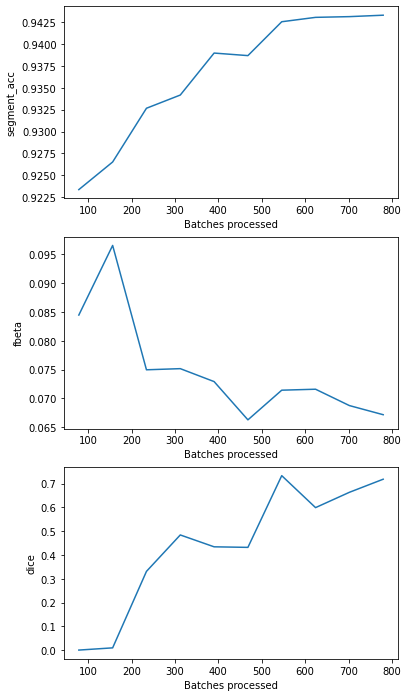

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.save('rn34-stage-2');

In [ ]:
learn.load('rn34-stage-2')

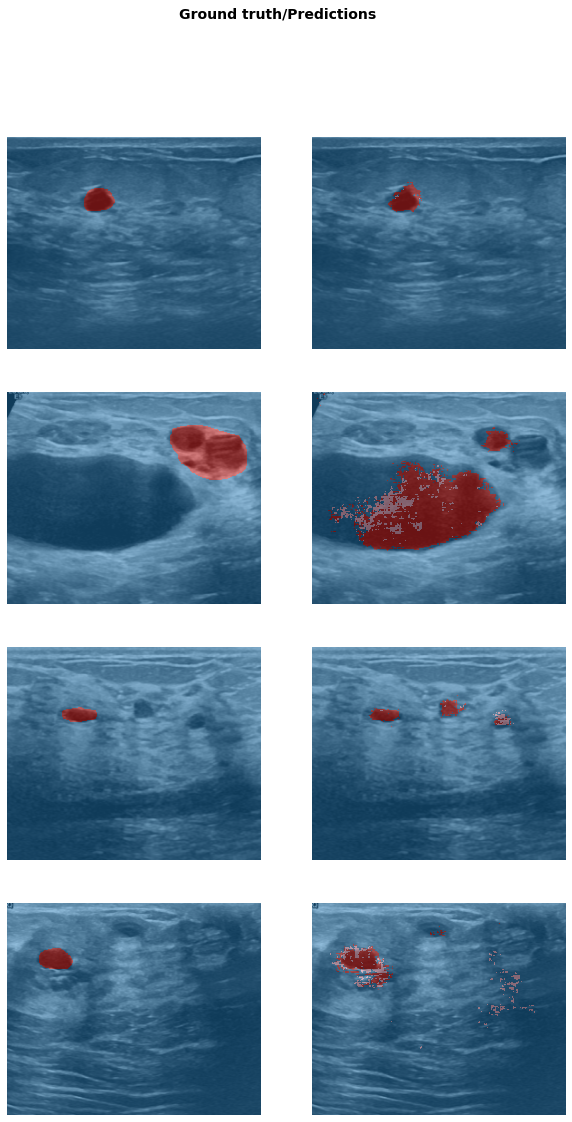

In [ ]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

In [ ]:
# get predictions
img2 = learn.data.train_ds[0][0]
learn.predict(img2)

## Unfreeze - stage 2

In [ ]:
# !!! cleanup GPU memory
learn=None
gc.collect()

20321

In [ ]:
learn.unfreeze()

In [ ]:
# 2021-05-21 mask (0,1,2) converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-6, 1e-5), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time
0,0.216170,0.178447,0.941417,0.066942,0.757694,01:30
1,0.210262,0.180624,0.942517,0.061202,0.779687,01:31
2,0.209596,0.168721,0.945426,0.063771,0.893989,01:31
3,0.212187,0.172890,0.944646,0.073761,0.524018,01:31
4,0.204448,0.162932,0.945742,0.074969,0.782902,01:31
5,0.185127,0.163814,0.948412,0.072092,0.821532,01:31
6,0.184815,0.154376,0.948893,0.072218,0.901577,01:31
7,0.187658,0.158933,0.947744,0.066250,0.945543,01:31
8,0.180238,0.155657,0.948383,0.066050,0.927341,01:31
9,0.174874,0.156018,0.948120,0.065414,0.988534,01:30


In [ ]:
# 2021-05-15 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.205976,0.205590,0.934267,0.240389,0.210060,00:45
1,0.209626,0.204185,0.934557,0.255950,0.208937,00:44
2,0.207695,0.224278,0.931833,0.339484,0.201497,00:45
3,0.198103,0.213595,0.931576,0.219856,0.213839,00:45
4,0.198619,0.197235,0.936704,0.278138,0.207328,00:45
5,0.209720,0.222360,0.933020,0.250736,0.209035,00:45
6,0.197864,0.217198,0.934542,0.246616,0.209347,00:45
7,0.190496,0.222516,0.933111,0.264245,0.206125,00:45
8,0.195590,0.227302,0.933757,0.274491,0.206183,00:45
9,0.219620,0.225335,0.932605,0.269784,0.207551,00:45


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, raw normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.220070,0.238054,0.925873,0.226632,00:39
1,0.224258,0.243184,0.925919,0.226177,00:39
2,0.236039,0.231440,0.926739,0.226174,00:39
3,0.219903,0.228456,0.928680,0.226442,00:39
4,0.214808,0.228149,0.929503,0.225716,00:39
5,0.215424,0.227029,0.927927,0.225339,00:39
6,0.214540,0.222745,0.930517,0.225927,00:39
7,0.212415,0.220238,0.930937,0.225718,00:39
8,0.208618,0.221943,0.929063,0.225574,00:39
9,0.203854,0.220526,0.930871,0.225431,00:39


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.198166,0.208094,0.930954,0.125615,0.226105,00:39
1,0.208642,0.218448,0.929450,0.137732,0.225689,00:39
2,0.210024,0.205879,0.931914,0.106178,0.226307,00:39
3,0.203483,0.205571,0.932296,0.143935,0.225862,00:39
4,0.207293,0.206998,0.931680,0.129237,0.226569,00:39
5,0.190613,0.209117,0.932054,0.148965,0.224923,00:39
6,0.196162,0.203117,0.932890,0.128392,0.226529,00:39
7,0.190583,0.202089,0.932580,0.123827,0.226179,00:39
8,0.193162,0.197490,0.933564,0.130122,0.226000,00:39
9,0.190573,0.200867,0.933167,0.127935,0.225705,00:39


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.219642,0.179820,0.943247,0.160509,00:40
1,0.225027,0.178025,0.944516,0.155386,00:40
2,0.227981,0.177613,0.943962,0.158093,00:40
3,0.223974,0.174977,0.945559,0.159943,00:40
4,0.230316,0.173564,0.945725,0.157475,00:40
5,0.213193,0.171717,0.946103,0.154902,00:40
6,0.219244,0.168646,0.946334,0.159927,00:40
7,0.210542,0.167459,0.947034,0.157358,00:40
8,0.204545,0.166240,0.947413,0.157921,00:40
9,0.204037,0.168938,0.946618,0.155977,00:40


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(20, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.182044,0.200920,0.928753,0.153761,00:37
1,0.185224,0.200621,0.929104,0.153760,00:37
2,0.191559,0.199428,0.929077,0.153757,00:37
3,0.190332,0.196951,0.929872,0.153756,00:37
4,0.184559,0.199506,0.928913,0.153752,00:37
5,0.180102,0.202181,0.929883,0.153748,00:37
6,0.185050,0.194288,0.930685,0.153746,00:37
7,0.177844,0.196282,0.930280,0.153745,00:37
8,0.174446,0.196607,0.929580,0.153742,00:37
9,0.176862,0.199069,0.929136,0.153741,00:37


In [ ]:
# pretrained. imagenet normalized.
learn.fit_one_cycle(10, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.193952,0.207608,0.922697,0.151760,01:36
1,0.191385,0.207901,0.925078,0.151756,01:36
2,0.191500,0.201987,0.925254,0.151754,01:35
3,0.184865,0.201407,0.926229,0.151753,01:36
4,0.195353,0.201731,0.923505,0.151752,01:36
5,0.199149,0.205014,0.922346,0.151750,01:36
6,0.190467,0.202436,0.925549,0.151750,01:36
7,0.196898,0.202678,0.925053,0.151749,01:36
8,0.187380,0.203164,0.923801,0.151749,01:35
9,0.190016,0.203009,0.925097,0.151748,01:36


In [ ]:
learn.save('stage-3-unfreezed');

In [ ]:
learn.load('stage-3-unfreezed')

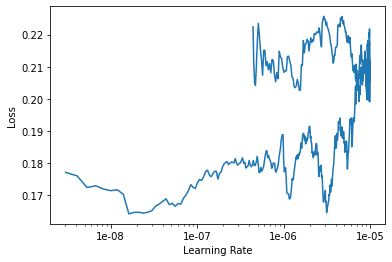

In [ ]:
learn.recorder.plot()

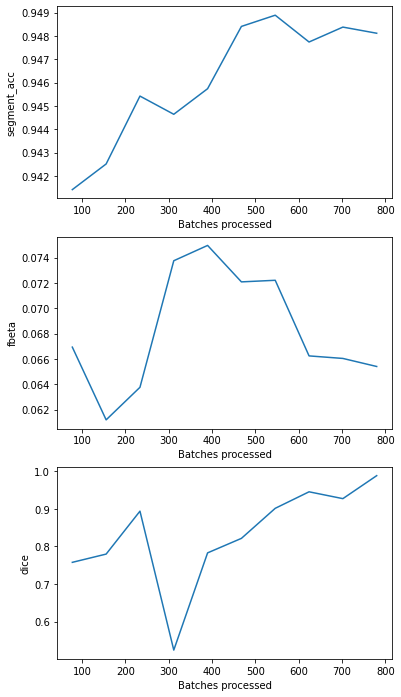

In [ ]:
learn.recorder.plot_metrics()

## Results stage 2 unfreezed

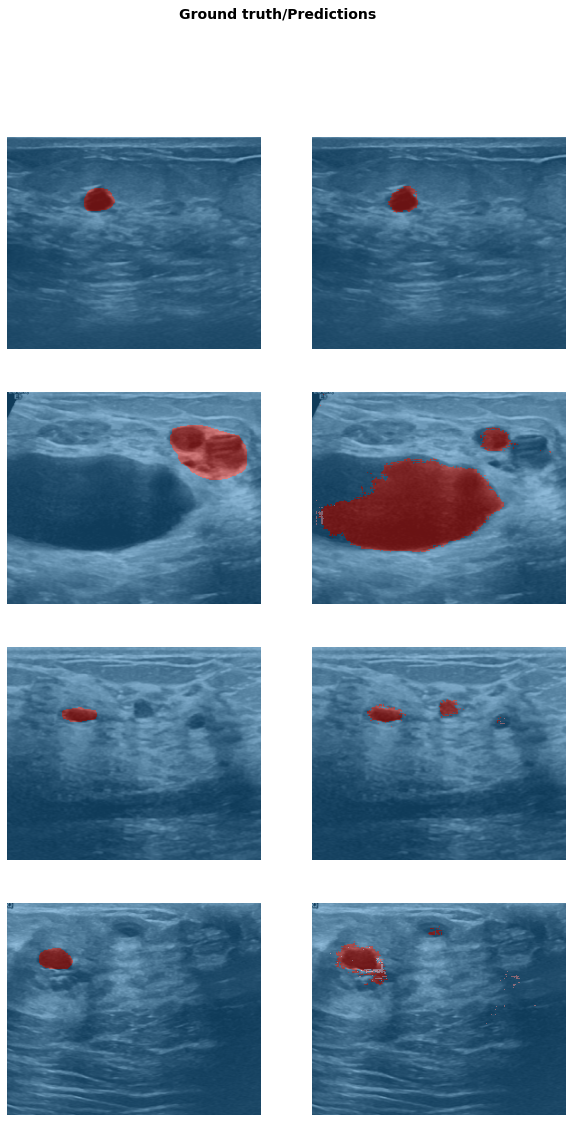

In [ ]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

In [ ]:
learn.save('rn34-stage-2');

In [ ]:
learn.load('rn34-stage-2')

## Learn some more stage 3

In [ ]:
# 2021-05-21 mask (0,1,2) converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-08, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time
0,0.171443,0.152043,0.949452,0.064487,0.976996,01:30
1,0.177782,0.154572,0.948350,0.061284,0.900969,01:30
2,0.182016,0.157543,0.947779,0.057298,0.826518,01:30
3,0.179844,0.158852,0.948112,0.061681,0.885450,01:30
4,0.176977,0.163940,0.947005,0.060241,0.754134,01:30
5,0.171387,0.162565,0.946221,0.058617,0.929224,01:30
6,0.179773,0.156695,0.948463,0.049628,0.881823,01:30
7,0.173225,0.157915,0.948583,0.045185,0.878250,01:30
8,0.180421,0.159156,0.948586,0.044243,0.831241,01:30
9,0.173786,0.158230,0.947870,0.043070,0.893128,01:31


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.211721,0.174067,0.945386,0.147177,00:40
1,0.209281,0.176087,0.944098,0.145784,00:40
2,0.209140,0.176444,0.943952,0.143910,00:40
3,0.220996,0.179479,0.941940,0.142269,00:40
4,0.217539,0.182017,0.943724,0.141404,00:40
5,0.225627,0.186013,0.942090,0.138124,00:40
6,0.223194,0.194433,0.941332,0.138842,00:40
7,0.228082,0.200447,0.938775,0.135461,00:40
8,0.238591,0.199031,0.939290,0.135670,00:40
9,0.243996,0.200430,0.939484,0.135091,00:40


In [ ]:
# SUSTOJAU CIA 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-07, 1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.201522,0.170507,0.946459,0.156066,00:40
1,0.204694,0.166268,0.946981,0.158002,00:40
2,0.210737,0.168383,0.945756,0.158799,00:40
3,0.202991,0.170596,0.946594,0.154275,00:40
4,0.200568,0.171552,0.946288,0.154543,00:40
5,0.198569,0.172376,0.946605,0.154276,00:40
6,0.202465,0.169602,0.946457,0.155002,00:40
7,0.199363,0.171510,0.945959,0.155691,00:40
8,0.206565,0.172565,0.945755,0.154781,00:40
9,0.206304,0.172579,0.945737,0.155128,00:40


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(20, slice(1e-8, 1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.165992,0.152149,0.944794,0.126710,00:38
1,0.162164,0.155095,0.944134,0.126946,00:38
2,0.167173,0.156907,0.942042,0.126072,00:39
3,0.167477,0.156592,0.942942,0.127145,00:39
4,0.171386,0.154553,0.943341,0.126995,00:39
5,0.167331,0.154013,0.943767,0.126451,00:39
6,0.171507,0.156180,0.942919,0.127220,00:39
7,0.164640,0.156133,0.943440,0.127151,00:39
8,0.166054,0.159301,0.942032,0.126925,00:39
9,0.168429,0.159018,0.942094,0.127428,00:39


## Results stage 3

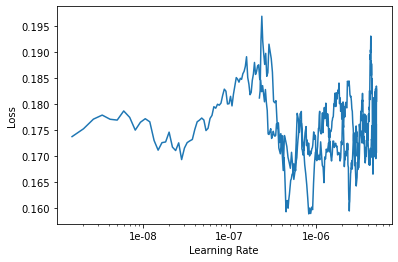

In [ ]:
learn.recorder.plot()

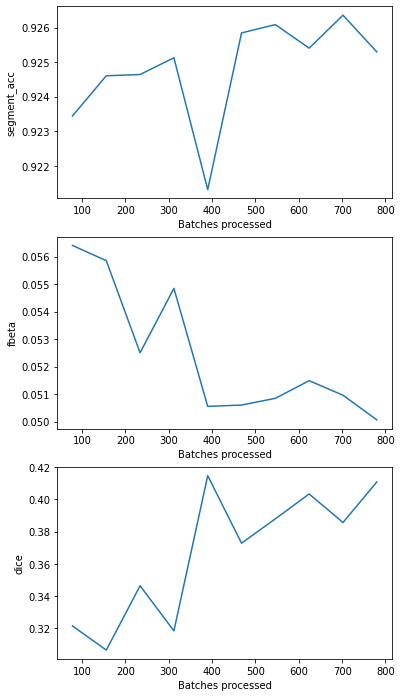

In [ ]:
learn.recorder.plot_metrics()

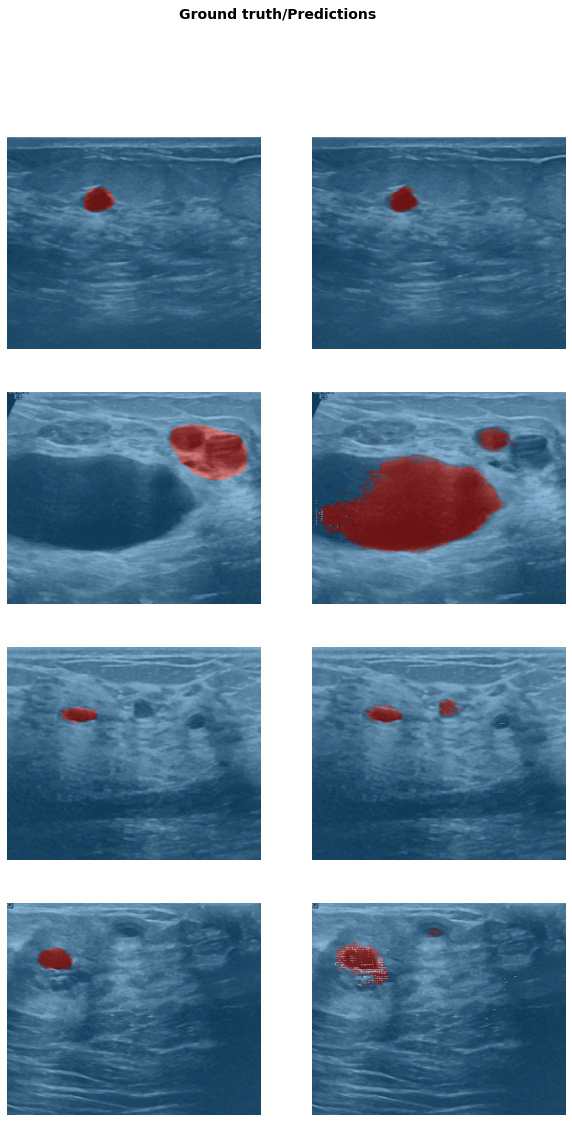

In [ ]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

RuntimeError: ignored

In [ ]:
losses, idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(12, 12)) # , heatmap=True

# Model resnet50

## Train stage 1

In [ ]:
torch.cuda.empty_cache()

In [ ]:
learn = unet_learner(dls, models.resnet50, wd=wd, 
                    #  y_range=(0.0,1.0), 
                    #  loss_func=custom_loss,
                     metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


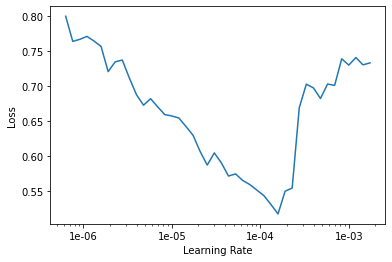

In [ ]:
# 2021-05-21 imagenet normalized
lr_find(learn)
learn.recorder.plot()

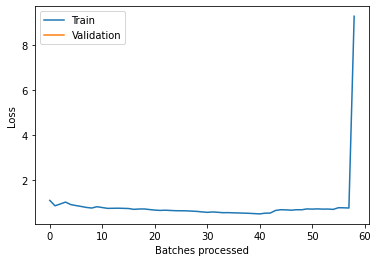

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('rn50-stage-1')

## Train stage 2

In [ ]:
# 2021-05-21 imagenet normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,dice,time
0,0.347043,0.259385,0.928379,0.170627,0.252899,12:05
1,0.268248,0.252326,0.933591,0.161347,0.336734,12:04
2,0.258009,0.198089,0.940091,0.172360,0.650744,12:04
3,0.239583,0.185819,0.941381,0.171903,0.532623,12:04
4,0.230529,0.173892,0.947352,0.167056,0.729509,12:03
5,0.218373,0.172318,0.945966,0.171685,0.915253,12:02
6,0.221980,0.249754,0.937939,0.161604,0.515255,12:02
7,71950.203125,196271.859375,0.817437,0.152115,0.087639,11:52


KeyboardInterrupt: ignored